In [1]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
!pip install datascience 
from datascience import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [31]:
# Read in Data
raw_Education = pd.read_excel('Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('Unemployment.xls',header = 9)
raw_financial_aid = pd.read_excel('FinancialAidByLocation.xls',header = 4)

#Filtering Data
filtered_education = raw_Education[raw_Education['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1)
filtered_population_estimates = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1)
filtered_poverty_estimate = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]\
                            .dropna(axis = 1)
filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())]\
                                .dropna(axis = 1)
    
filtered_financial_aid = raw_financial_aid[['Location','Disbursements                                        (in millions).1',\
                   'Recipients                                              (in thousands).1']].\
                    rename(columns = \
                           {'Disbursements                                        (in millions).1':'Disbursements',\
                            'Recipients                                              (in thousands).1':'Recepient'})\
                    [raw_financial_aid['Location'].isin(states.values())]
        
# putting into the Datascience Table format
education_raw = Table.from_df(filtered_education)
population_estimate_raw = Table.from_df(filtered_population_estimates)
poverty_estimates_raw = Table.from_df(filtered_poverty_estimate)
unemployment_raw = Table.from_df(filtered_unemployment)
financial_aid_raw = Table.from_df(filtered_financial_aid)

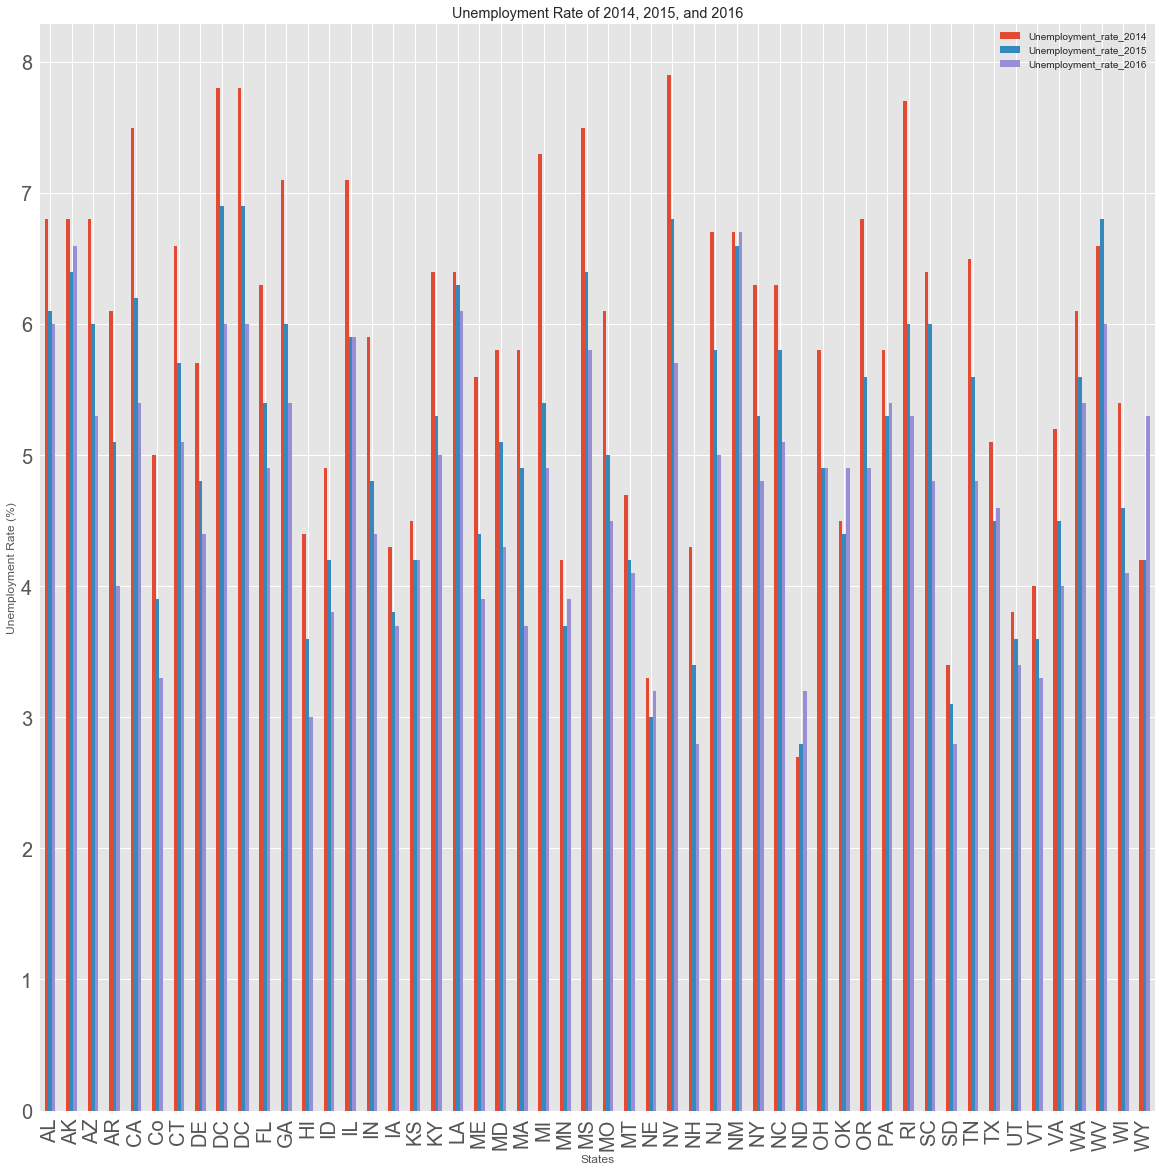

In [120]:
# Plotting unemployment rate for year 2014, 2015, 2016
#filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())].drop(['Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013'],axis = 1)
unemployment_rate_2014_2015_2016 = filtered_unemployment[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']]
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)

unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


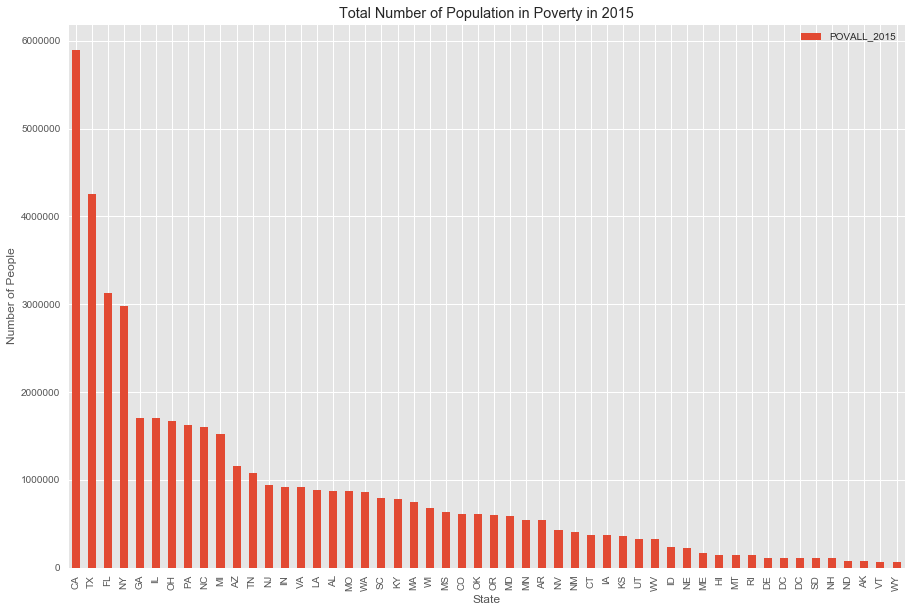

In [121]:
cleaned_sort_by_states = filtered_poverty_estimate.drop(sort_by_states.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Number of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')

In [60]:
education_raw = Table.from_df(filtered_education)
population_estimate_raw = Table.from_df(filtered_population_estimates)
poverty_estimates_raw = Table.from_df(filtered_poverty_estimate)
unemployment_raw = Table.from_df(filtered_unemployment)
financial_aid_raw = Table.from_df(filtered_financial_aid)

overall = education_raw.join('Area_Name',population_estimate_raw,'Area_Name').\
        join('Area_Name',poverty_estimates_raw,'Area_Name').\
        join('Area_Name',unemployment_raw,'Area_name').\
        join('Area_Name',financial_aid_raw,'Location').\
        drop(['Rural-urban_Continuum_Code_2003','Urban_Influence_Code_2003','Rural-urban_Continuum_Code_2013','Urban_Influence_Code_2013'])


In [61]:
overall

Area_Name,FIPS Code,State,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2011-2015","High school diploma only, 2011-2015","Some college or associate's degree, 2011-2015","Bachelor's degree or higher, 2011-2015","Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",FIPS,State_2,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,FIPStxt,State_3,POVALL_2015,CI90LBAll_2015,CI90UBALL_2015,PCTPOVALL_2015,CI90LBALLP_2015,CI90UBALL